This tutorial will highligh the major viz related features of Datamol.

In [1]:
import datamol as dm

First let's get a dataset.

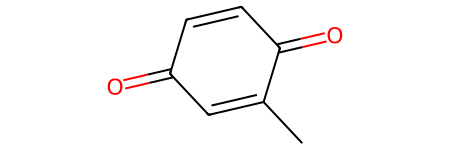

In [20]:
data = dm.read_csv(
    "https://raw.githubusercontent.com/rdkit/rdkit/master/Data/NCI/first_200.tpsa.csv",
    comment="#",
    header=None,
)
data.columns = ["smiles", "tpsa"]

# Create a mol column
with dm.without_rdkit_log():
    data["mol"] = data["smiles"].apply(dm.to_mol)

# Patch the dataframe to render the molecules in it
dm.render_mol_df(data)

data.iloc[0]["mol"]

Now let's cluster the molecules and only keep the first cluster.

In [21]:
cluster_indices, cluster_mols = dm.cluster_mols(data["mol"].dropna().tolist(), cutoff=0.7)
mols = cluster_mols[1]

Display the molecules of the cluster while aligning then using MCS. This can be done using a simple boolean flag in `dm.to_image()`.

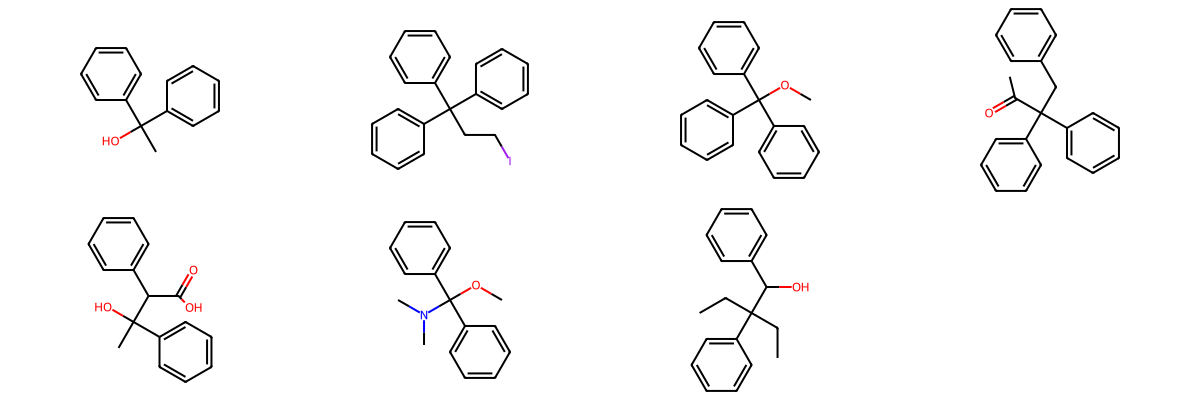

In [22]:
dm.to_image(mols, mol_size=(300, 200), align=True, use_svg=False)

#### Lasso Highlighting
The code below will show how the lasso highlight function should be used. The signature for this function is
```
def lasso_highlight_image(
    canvas_width: int, 
    canvas_height: int,
    target_molecule: Union[str, dm.Mol],
    search_molecules: Union[str, List[str], dm.Mol, List[dm.Mol]]
    ) -> Image:
```
The canvas is the size of the image returned and the target molecule is accepted in the smiles format or mol object and the substructure search as smarts string or mol object. 

It is quite difficult to test the production of images so the edge cases will be entered here with a brief description of each.

An edge case is that you can only search for up to 6 substructures unless more colors are added to the code.


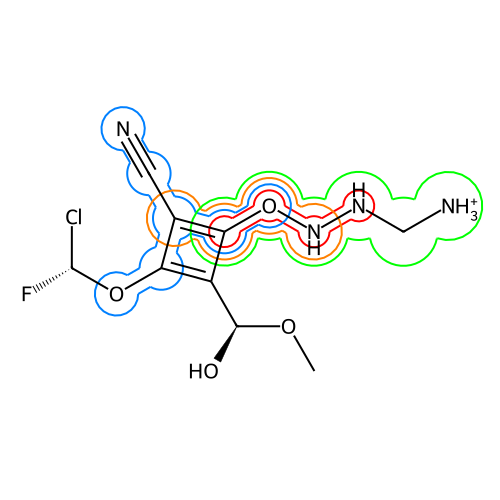

In [23]:
# Exemplary molecule
smi = "CO[C@@H](O)C1=C(O[C@H](F)Cl)C(C#N)=C1ONNC[NH3+]"
# List of exemplpary substructures
smarts_list = ["CONN", "N#CC~CO", "C=CON", "CONNCN"]

dm.lasso_highlight_image(500, 500, smi, smarts_list)

Alternatively you may only have one substructure in mind

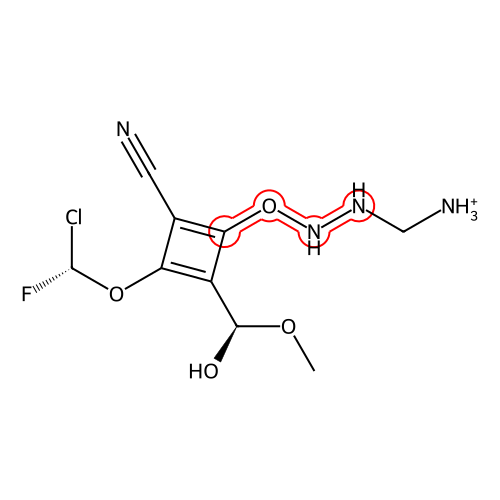

In [24]:
smi = "CO[C@@H](O)C1=C(O[C@H](F)Cl)C(C#N)=C1ONNC[NH3+]"
smarts_list = "CONN"
dm.lasso_highlight_image(500, 500, smi, smarts_list)